<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.2 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [5]:
import pandas as pd
import numpy as np
import pandas as pd

import seaborn as sns
%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Find Dependent and Independent Variables to predict house price.

In [2]:
# Read CSV
house_csv = r'~\Documents\IOD-testing\DATA\Sacramento_transactions.csv'
df=pd.read_csv(house_csv)
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [ ]:
# ANSWER
price is the target variable here as it is the most interesting thing we want to know and forcast 

#### 2.2 List all possible variables which might be Independent/Predictor variable.

In [ ]:
# ANSWER

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [3]:
# ANSWER
df.corr()

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,0.125319,0.069165,0.130108,-0.093353,-0.290389,-0.539904
beds,0.125319,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.069165,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.130108,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,-0.093353,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.290389,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.539904,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


<AxesSubplot:>

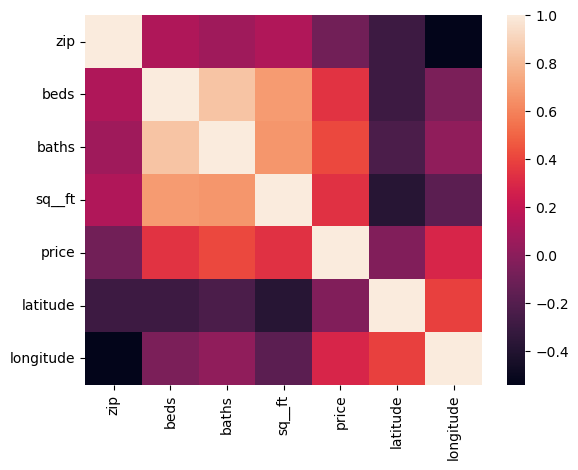

In [ ]:
sns.heatmap(df.corr())

#### 2.4 Find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

Create an instance of LinearRegression.

Explore following methods:

- fit
- predict
- score

In [11]:
from sklearn.linear_model import LinearRegression

##### 2.4.1 Fit predictor and target variables using linear regression 

In [60]:
# ANSWER

X = df['sq__ft'].values.reshape(-1,1)
Y = df['price']

lm=LinearRegression()
lm.fit(X,Y)
print('intercept: ',lm.intercept_)
print('coefficient: ',lm.coef_)

yhat=lm.predict(X)

intercept:  162930.16140699777
coefficient:  [54.15863969]


##### 2.4.2 Find R Score

Find $R^2$ Using ```score``` method of Linear Regression.

In [17]:
# ANSWER
lm.score(X,Y)

0.11148717682951437

### 3. Splitting Data

In [18]:
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Using `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [19]:
# ANSWER
## Create training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

#### 3.2 Check Shape, Sample of Test Train Data

In [22]:
# ANSWER
## Check training/test data
X_train.shape
y_train.shape


(659, 1)

In [25]:
X_train.shape[0]/X.shape[0]

0.6690355329949239

In [23]:
X_test.shape
y_test.shape

(326, 1)

In [26]:
X_test.shape[0]/X.shape[0]

0.33096446700507615

#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using X_test, y_test

In [37]:
# ANSWER
lm.fit(X_train,y_train)


LinearRegression()

In [38]:
# ANSWER
print('score of train data: ',lm.score(X_train,y_train))
print('score of test data: ',lm.score(X_test,y_test))

score of train data:  0.08614711011567588
score of test data:  0.13602012247180006


### 4. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using linear regression model.**

In [64]:
# ANSWER
lm.fit(X_train,y_train)
b0=lm.intercept_
b1=lm.coef_
x=1204 

predict= b0+b1*x
print('predict house price with sq-fit of 1204:', predict[0,0])

predict house price with sq-fit of 1204: 223594.18266380776


#### Find the error

In [56]:
# Predict price from X_test
y_test_prd=lm.predict(X_test)

from sklearn.metrics import mean_squared_error
print('MSE on test sample: ',mean_squared_error(y_test,y_test_prd))

MSE on test sample:  18951801967.76203




---



---



> > > > > > > > > © 2022 Institute of Data


---



---



